# T2 - Plotting, printing, and saving

This tutorial provides a brief overview of options for plotting results, printing objects, and saving results.

## Global plotting configuration

Covasim allows the user to set various options that apply to all plots. You can change the font size, default DPI, whether plots should be shown by default, etc. (for the full list, see `help(cv.options.set)`). For example, we might want higher resolution, to turn off automatic figure display, close figures after they're rendered, and to turn off the messages that print when a simulation is running. We can do this (and then run a sim) with:

In [1]:
import covasim as cv

cv.options.set(dpi=100, show=False, close=True, verbose=0)

sim = cv.Sim()
sim.run()

Covasim 2.0.2 (2020-02-01) — © 2021 by IDM


## Printing objects

There are three levels of detail available for most objects (sims, multisims, scenarios, and people). The shortest is `brief()`:

In [2]:
sim.brief()

Sim(<no label>; 2020-03-01 to 2020-04-30; pop: 20000 random; epi: 13576⚙, 24☠)


You can get more detail with `summarize()`:

In [3]:
sim.summarize()

Simulation summary:
   13576 cumulative infections
   11814 cumulative infectious
       0 cumulative tests
       0 cumulative diagnoses
    7139 cumulative recoveries
    7733 cumulative symptomatic cases
     515 cumulative severe cases
     134 cumulative critical cases
      24 cumulative deaths
       0 cumulative quarantined people



Finally, to show the full object, including all methods and attributes, use `disp()` (which is also the default if you just type `print(sim)`:

In [4]:
sim.disp()

————————————————————————————————————————————————————————————
Methods:
  _brief()            export_results()    plot()              
  _disp()             finalize()          plot_result()       
  _get_ia()           get_analyzer()      rescale()           
  brief()             get_analyzers()     reset_layer_pars()  
  compute_doubling()  get_intervention()  result_keys()       
  compute_fit()       get_interventio...  run()               
  compute_gen_time()  init_analyzers()    save()              
  compute_prev_in...  init_interventi...  set_metadata()      
  compute_r_eff()     init_people()       set_seed()          
  compute_results()   init_results()      shrink()            
  compute_summary()   initialize()        step()              
  compute_yield()     layer_keys()        summarize()         
  copy()              load()              to_excel()          
  date()              load_data()         to_json()           
  day()               load_population()   update

## Plotting options

While a sim can be plotted using default settings simply by `sim.plot()`, this is just a small fraction of what's available. First, note that results can be plotted directly using e.g. Matplotlib. You can see what quantities are available for plotting with `sim.results.keys()` (remember, it's just a dict). A simple example of plotting using Matplotlib is:

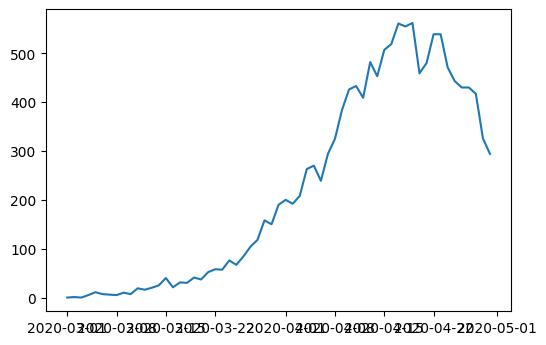

In [5]:
import pylab as pl # Shortcut for import matplotlib.pyplot as plt
pl.plot(sim.results['date'], sim.results['new_infections'])

However, as you can see, this isn't ideal since the default formatting is...not great. (Also, note that each result is a `Result` object, not a simple Numpy array; like a pandas dataframe, you can get the array of values directly via e.g. `sim.results['new_infections'].values`.)

An alternative, if you only want to plot a single result, such as new infections, is to use the `plot_result()` method:

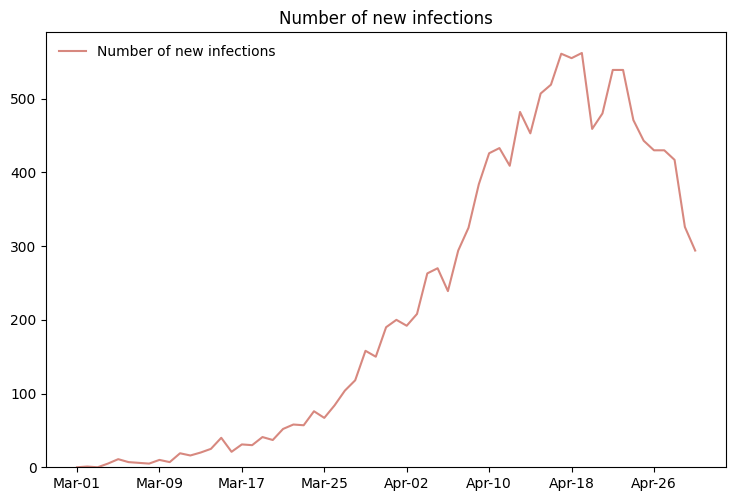

In [6]:
sim.plot_result('new_infections')

You can also select one or more quantities to plot with the `to_plot` argument, e.g.

In [ ]:
sim.plot(to_plot=['new_infections', 'cum_infections'])

Another useful option is to plot an overview of everything in a simulation. We can do this with the `to_plot='overview'` argument. It's quite a lot of information so we might also want to make a larger figure for it, which we can do by passing additional arguments via the `fig_args` argument (which is passed to `pl.figure()`).

In [ ]:
sim.plot(to_plot='overview', fig_args=dict(figsize=(30,15)))

## Saving options

Saving is pretty simple. The simplest way to save is simply

In [ ]:
sim.save('my-awesome-sim.sim')

Technically, this saves as a gzipped pickle file (via `sc.saveobj()` using the Sciris library). By default this does not save the people in the sim since they are very large (and since, if the random seed is saved, they can usually be regenerated). If you want to save the people as well, you can use the `keep_people` argument. For example, here's what it would look like to create a sim, run it halfway, save it, load it, change the overall transmissibility (beta), and finish running it:

In [ ]:
sim_orig = cv.Sim(start_day='2020-04-01', end_day='2020-06-01', label='Load & save example')
sim_orig.run(until='2020-05-01')
sim_orig.save('my-half-finished-sim.sim') # Note: Covasim always saves the people if the sim isn't finished running yet

sim = cv.load('my-half-finished-sim.sim')
sim['beta'] *= 0.3
sim.run()
sim.plot(to_plot=['new_infections', 'n_infectious', 'cum_infections'])

Aside from saving the entire simulation, there are other export options available. You can export the results and parameters to a JSON file (using `sim.to_json()`), but probably the most useful is to export the results to an Excel workbook, where they can easily be stored and processed with e.g. Pandas:

In [ ]:
import pandas as pd

sim.to_excel('my-sim.xlsx')
df = pd.read_excel('my-sim.xlsx')
print(df)